<a href="https://colab.research.google.com/github/jayesh20011996/abc/blob/main/regression_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [3]:
house_data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [4]:
house_data.rename(columns={'Living.Room':'Livingroom'}, inplace=True)

In [8]:
house_data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Livingroom', 'Bathroom',
       'Price'],
      dtype='object')

In [9]:
variables = list(house_data.columns)
y = 'Price'
x = [var for var in variables if var not in y]

In [11]:
import statsmodels.api as sm
model_simple = sm.OLS(house_data[y], house_data[x]).fit()
model = sm.OLS(house_data[y], sm.add_constant(house_data[x])).fit()
print(model_simple.summary())
print('#######################################################')
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              1330.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:13:12   Log-Likelihood:                         -7285.4
No. Observations:                 645   AIC:                                  1.458e+04
Df Residuals:                     639   BIC:                                  1.461e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
drop_var = ['TotalFloor', 'Bedroom', 'Livingroom', 'Bathroom', 'Price']
x_new = [var for var in variables if var not in drop_var]

In [19]:
model_new = sm.OLS(house_data[y], sm.add_constant(house_data[x_new])).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     741.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.56e-167
Time:                        15:07:40   Log-Likelihood:                -7289.1
No. Observations:                 645   AIC:                         1.458e+04
Df Residuals:                     642   BIC:                         1.460e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2289.9949   1977.443     -1.158      0.2

In [20]:
house_data['predicted_price'] = model_new.predict(sm.add_constant(house_data[x_new]))
house_data

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price,predicted_price
1,1177.698,2,7,2,2,2,62000,44211.772105
2,2134.800,5,7,4,2,2,78000,83629.186307
3,1138.560,5,7,2,2,1,58000,46293.510863
4,1458.780,2,7,3,2,2,45000,54745.766248
5,967.776,11,14,3,2,2,45000,46990.104231
...,...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000,56926.361098
645,377.148,4,10,1,1,1,24800,16575.555009
646,740.064,13,14,1,1,1,45000,40821.900515
647,1707.840,3,14,3,2,2,65000,65262.517588


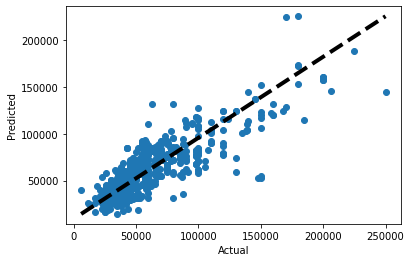

In [23]:
fig, ax = plt.subplots()
ax.scatter(house_data['Price'], house_data['predicted_price'])
ax.plot([house_data['Price'].min(), house_data['Price'].max()], [house_data['predicted_price'].min(), house_data['predicted_price'].max()], 'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()